# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ravy Ardian Kusuma
- **Email:** ravyardian13@gmail.com
- **ID Dicoding:** apiyay

## Menentukan Pertanyaan Bisnis

- Produk apa dengan jumlah penjualan paling banyak dan paling sedikit?
- Bagaimana tingkat kepuasan pembeli terhadap layanan?
- Bagaimana data jumlah penjualan setiap bulan?
- Berapa banyak jumlah uang yang dikeluarkan customer setiap bulan?
- Lokasi geografis manakah yang memiliki pelanggan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime as dt
import urllib
from unidecode import unidecode

## Data Wrangling

### Gathering Data

Membaca seluruh dataset

In [2]:
all_df = {}
all_df['customers'] = pd.read_csv('data/olist_customers_dataset.csv')
all_df['geolocation'] = pd.read_csv('data/olist_geolocation_dataset.csv')
all_df['order_items'] = pd.read_csv('data/olist_order_items_dataset.csv')
all_df['order_payments'] = pd.read_csv('data/olist_order_payments_dataset.csv')
all_df['order_reviews'] = pd.read_csv('data/olist_order_reviews_dataset.csv')
all_df['orders'] = pd.read_csv('data/olist_orders_dataset.csv')
all_df['products'] = pd.read_csv('data/olist_products_dataset.csv')
all_df['sellers'] = pd.read_csv('data/olist_sellers_dataset.csv')
all_df['product_category'] = pd.read_csv('data/product_category_name_translation.csv')

Menampilkan beberapa data dari setiap dataset

In [3]:
all_df['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
all_df['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
all_df['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
all_df['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
all_df['order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
all_df['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
all_df['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
all_df['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
all_df['product_category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Cek tipe data dari tiap kolom dataset

In [12]:
for df_name, df in all_df.items():
    print(f'{df_name} dataset')
    print(all_df[df_name].info(), '\n')

customers dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

geolocation dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   ge

Cek data yang hilang/null

In [13]:
null_counts = {}

for df_name, df in all_df.items():
    null_counts[df_name] = df.isna().sum()
    print(f'{df_name} dataset')
    print(null_counts[df_name], '\n')

customers dataset
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

geolocation dataset
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

order_items dataset
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

order_payments dataset
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

order_reviews dataset
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_times

Cek data yang terduplikat

In [14]:
duplicate_counts = {}
total_sample_counts = {}

for df_name, df in all_df.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)

duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
customers,99441,0
geolocation,1000163,261831
order_items,112650,0
order_payments,103886,0
order_reviews,99224,0
orders,99441,0
products,32951,0
sellers,3095,0
product_category,71,0


Cek deskripsi data

In [15]:
for df_name, df in all_df.items():
    print(f'{df_name} dataset \n', all_df[df_name].describe(), '\n')

customers dataset 
        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000 

geolocation dataset 
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02 

order_items dataset 
        order_item_id   

### Cleaning Data

Mengubah tipe data obj/str menajadi tipe data datetime

In [16]:
orders_col = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    all_df['orders'][col] = pd.to_datetime(all_df['orders'][col])

In [17]:
order_review_col = ['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    all_df['order_reviews'][col] = pd.to_datetime(all_df['order_reviews'][col])

In [18]:
order_item_col = ['shipping_limit_date']
for col in order_item_col:
    all_df['order_items'][col] = pd.to_datetime(all_df['order_items'][col])

Menghapus data yang terduplikat

In [19]:
all_df['geolocation'].drop_duplicates(inplace=True)

Mengatasi data yang hilang/null

In [20]:
all_df['order_reviews'].isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Mengubah nilai column review_comment_title yang memiliki nilai null dengan default string "No Tittle"

In [21]:
all_df['order_reviews'].fillna({"review_comment_title": "No Title"}, inplace=True)

Mengubah nilai column review_comment_message yang memiliki nilai null dengan default string "No Message"

In [22]:
all_df['order_reviews'].fillna({"review_comment_message": "No Message"}, inplace=True)

Jumlah nilai yang hilang/null pada df_order_reviews setelah dilakukan data cleaning

In [23]:
all_df['order_reviews'].isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Tidak menghapus data yang hilang/null karena bisa menghilangkan data yang penting

In [24]:
all_df['orders'].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
all_df['products'].isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore customers

In [26]:
all_df['customers']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [27]:
all_df['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [28]:
all_df['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- asal kota customers terbanyak dari sao paulo

### Explore df_geolocation

In [29]:
all_df['geolocation']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


Melakukan decode text karena terdapat text dengan format yang jelek

Contoh: são paulo -> sao paulo

Jumlah data sebelum di decode text

In [30]:
(all_df['geolocation']['geolocation_city'] == 'são paulo').sum()

19718

Menggunakan unicode untuk decode text

In [31]:
all_df['geolocation']['geolocation_city'] = all_df['geolocation']['geolocation_city'].apply(lambda x: unidecode(x))

Jumlah data setelah di decode text

In [32]:
(all_df['geolocation']['geolocation_city'] == 'são paulo').sum()

0

In [33]:
all_df['geolocation'].groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,99643
1,rio de janeiro,RJ,35175
2,belo horizonte,MG,19474
3,curitiba,PR,11263
4,brasilia,DF,8791
...,...,...,...
6345,jordao,CE,1
6346,silves,AM,1
6347,california da barra (barra do pirai),RJ,1
6348,calheiros,RJ,1


**Insight:**
- terdapat kata/text yang perlu di decode agar format menjadi rapih dan sesuai

### Explore order_payments

In [34]:
all_df['order_payments']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [35]:
all_df['order_payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

**Insight:**
- jenis pembayaran terbanyak menggunakan credit card

### Explore orders

In [36]:
all_df['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [37]:
all_df['orders']['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [38]:
print('Orders delivered have reached ' +
      str(round((all_df['orders'].order_status.value_counts()['delivered']/len(all_df['orders']))*100,2)) + '%.')

Orders delivered have reached 97.02%.


Merge customers & orders

In [39]:
customers_orders_df = pd.merge(
    left=all_df['customers'],
    right=all_df['orders'],
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Merge order_payments & order_reviews

In [40]:
payments_reviews_df = pd.merge(
    left=all_df['order_payments'],
    right=all_df['order_reviews'],
    how='left',
    left_on='order_id',
    right_on='order_id'
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Title,No Message,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Title,No Message,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Title,No Message,2017-12-21,2017-12-22 01:10:39


In [41]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

Merge customers_orders_df & payments_reviews_df

In [42]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore order_items & sellers

Merge order_items & sellers

In [43]:
item_seller_df = pd.merge(
    left=all_df['order_items'],
    right=all_df['sellers'],
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [44]:

item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head()

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: seller_id, dtype: int64

In [45]:

item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: seller_id, dtype: int64

**Insight:**
- kebanyakan penjual berasal dari sao paulo

### Explore products & product_category

Merge products & product_category

In [46]:
product_df = pd.merge(
    left=all_df['products'],
    right=all_df['product_category'],
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [47]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head()

product_category_name
cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: product_id, dtype: int64

In [48]:

product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head()

product_category_name_english
bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: product_id, dtype: int64

Merge items_seller_df & product_df

In [49]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [50]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore all_data_df

Merge all_data_df

In [51]:
all_data_df = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [52]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [53]:
all_data_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [54]:
all_data_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

### RFM

Setting sekarang 20/10/2018

In [55]:
now = dt.datetime(2018,10,20)
start_date_rfm = all_data_df['order_purchase_timestamp'].min()
end_date_rfm = all_data_df['order_purchase_timestamp'].max()

filtered_df_rfm = all_data_df[(all_data_df['order_purchase_timestamp'] >= start_date_rfm) &
                           (all_data_df['order_purchase_timestamp'] <= end_date_rfm)]

In [56]:
recency = (now - filtered_df_rfm.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = filtered_df_rfm.groupby('customer_id')['order_id'].count()
monetary = filtered_df_rfm.groupby('customer_id')['price'].sum()

rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [57]:
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list

In [58]:
rfm.sort_values(by='Recency',ascending=True)

,customer_id,Recency,Frequency,Monetary
63970,a4b417188addbc05b26b72d5e44837a1,2,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50


In [59]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


customer dengan pengeluaran terbesar

In [60]:
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,385,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,508,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,247,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,162,7,9520.14
...,...,...,...,...
70386,b4bade0909a2956cbeef036f6fd7b95e,274,1,0.00
33389,5645f6b97d3740bc2846f27af1fe973f,218,1,0.00
70474,b4f3d737d8ec2ad8a4e85fc6e578a4fc,434,1,0.00
33344,56252fddbb6af46b87f5a070d68afd95,166,1,0.00


customer dengan terakhir kali belanja

In [61]:
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
3354,08c5351a6aca1c1589a38f244edeee9d,775,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00


customer dengan pembelian terbanyak

In [62]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,437,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,391,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,499,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,160,24,359.76
...,...,...,...,...
35433,5b9d5dfe6b754261741fb68772efed93,258,1,22.99
35432,5b99d2ac45d9e913fa37e13a7e73f1fc,458,1,59.90
35431,5b985c8b77fba94494956d5f1e717933,164,1,120.00
35429,5b97e86cf344fc8159321fe9a84dbef9,537,1,139.90


jumlah total keuntungan berdasarkan state pada setiap produk kategori

In [63]:
all_data_df.groupby(by=['customer_state','product_category_name_english']).agg({
        'price':'sum'
}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

jumlah total keuntungan berdasarkan customer city pada setiap produk kategori

In [64]:
all_data_df.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum'
}).sort_values(by='price', ascending=False)

price
customer_city    product_category_name_english             
sao paulo        health_beauty                    195263.02
                 bed_bath_table                   184140.58
                 watches_gifts                    172269.07
                 sports_leisure                   154139.05
                 computers_accessories            147079.12
...                                                     ...
areal            pet_shop                              5.50
tupa             construction_tools_construction       3.99
palmeira d'oeste computers_accessories                 3.90
caldas novas     fashion_underwear_beach               3.90
hortolandia      construction_tools_construction       0.85

[25199 rows x 1 columns]

tingkat jumlah kepuasan pembeli terhadap layanan

In [65]:
all_data_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,66343
3,4.0,22319
2,3.0,9894
1,2.0,4162
0,1.0,15425


Convert all_data_df to csv

In [66]:
output_csv_path = "dashboard/main_data.csv"

all_data_df.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa dengan jumlah pembelian paling banyak dan paling sedikit?

In [67]:
start_date_sell = all_data_df['order_approved_at'].min()
end_date_sell = all_data_df['order_approved_at'].max()

filtered_df_sell = all_data_df[(all_data_df['order_approved_at'] >= start_date_sell) &
                           (all_data_df['order_approved_at'] <= end_date_sell)]

In [68]:
product_id_counts = filtered_df_sell.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)
sorted_df

,product_category_name_english,product_id
7,bed_bath_table,11987
43,health_beauty,10032
65,sports_leisure,9002
39,furniture_decor,8829
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


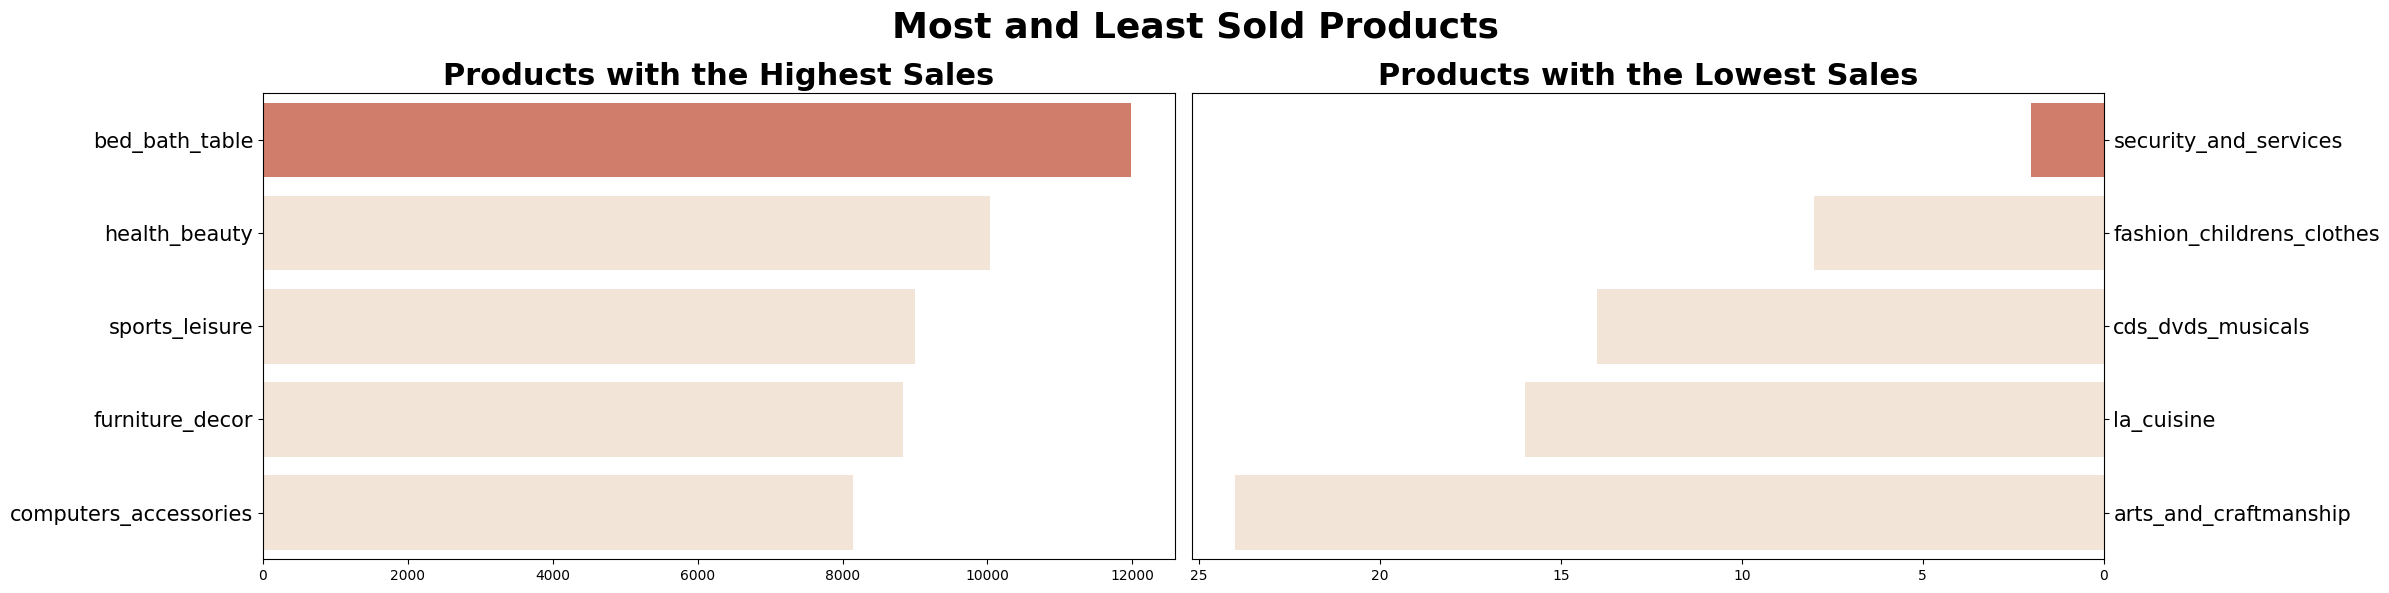

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#E2725B", "#d99b30", "#d99b30", "#d99b30", "#d99b30"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), hue="product_category_name_english", palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Products with the Highest Sales", loc="center", fontsize=22, fontweight='bold')
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), hue="product_category_name_english", palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Products with the Lowest Sales", loc="center", fontsize=22, fontweight='bold')
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Most and Least Sold Products", fontsize=26, fontweight='bold')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana tingkat kepuasan pembeli terhadap layanan?

In [70]:
start_date_rat = all_data_df['order_approved_at'].min()
end_date_rat = all_data_df['order_approved_at'].max()

filtered_df_rat = all_data_df[(all_data_df['order_approved_at'] >= start_date_rat) &
                           (all_data_df['order_approved_at'] <= end_date_rat)]

In [71]:
rating_service = filtered_df_rat['review_score'].value_counts().sort_index(ascending=False)
rating_service.index = pd.CategoricalIndex(rating_service.index, categories=[5, 4, 3, 2, 1], ordered=True)
rating_service

review_score
5    66292
4    22302
3     9876
2     4139
1    15362
Name: count, dtype: int64

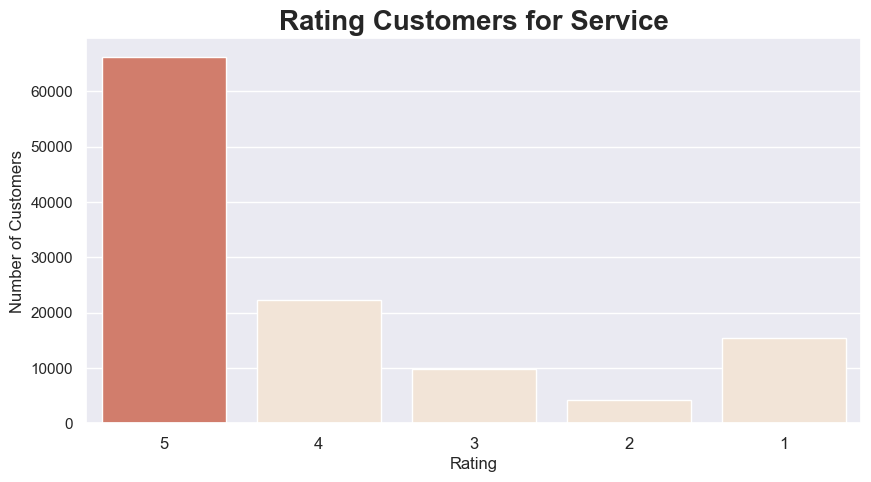

In [72]:
colors = ["#E2725B", "#d99b30", "#d99b30", "#d99b30", "#d99b30"]

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_service.index,
            y=rating_service.values,
            hue=rating_service.index,
            palette=colors,
            legend=False
            )

plt.title("Rating Customers for Service", fontsize=20, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=12)
plt.show()

### Pertanyaan 3: Bagaimana data jumlah penjualan setiap bulan?

In [73]:
start_date_order = all_data_df['order_purchase_timestamp'].min()
end_date_order = all_data_df['order_purchase_timestamp'].max()

In [74]:
monthly_df = all_data_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "size",
}).rename(columns={"order_id": "order_count"})
monthly_df

,order_count
order_purchase_timestamp,
2016-09-30,7
2016-10-31,401
2016-11-30,0
2016-12-31,1
2017-01-31,1035
2017-02-28,2123
2017-03-31,3243
2017-04-30,2878
2017-05-31,4485


In [75]:
monthly_df = monthly_df[(monthly_df.index >= start_date_order) & (monthly_df.index <= end_date_order)]
monthly_df = monthly_df.reset_index()
monthly_df['order_purchase_timestamp'] = monthly_df['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [76]:
min_index_order = monthly_df['order_count'].idxmin()
max_index_order = monthly_df['order_count'].idxmax()

min_timestamp_order = monthly_df['order_purchase_timestamp'].iloc[min_index_order]
max_timestamp_order = monthly_df['order_purchase_timestamp'].iloc[max_index_order]

min_order_count = monthly_df['order_count'].min()
max_order_count = monthly_df['order_count'].max()

print("Minimum Order Count:", min_order_count, "on", min_timestamp_order)
print("Maximum Order Count:", max_order_count, "on", max_timestamp_order)

Minimum Order Count: 0 on 2016-11
Maximum Order Count: 9191 on 2017-11


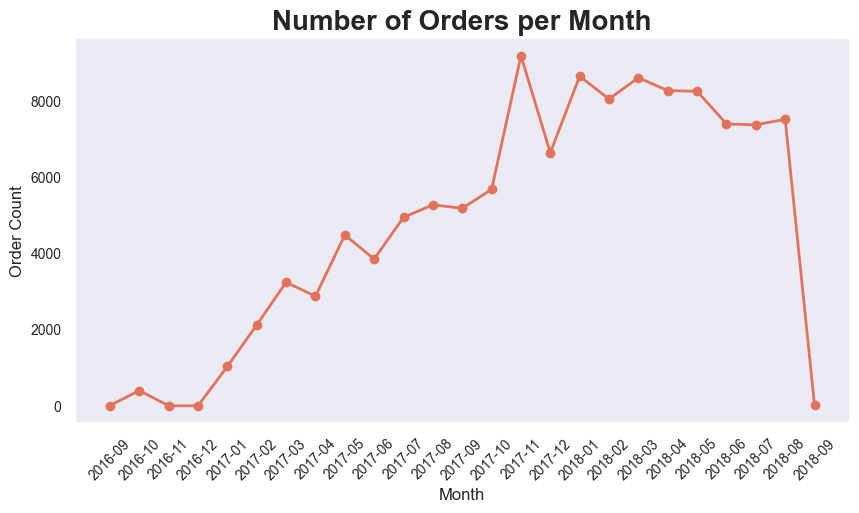

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_purchase_timestamp"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#E2725B"
)
plt.title("Total Orders per Month", loc="center", fontsize=20, fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.grid()
plt.show()

### Pertanyaan 4: Berapa banyak jumlah uang yang dikeluarkan customer setiap bulan?

In [78]:
start_date_spend = all_data_df['order_approved_at'].min()
end_date_spend = all_data_df['order_approved_at'].max()

In [79]:
sum_spend_df = all_data_df.resample(rule='ME', on='order_approved_at').agg({
    "price": "sum"
}).rename(columns={"price": "total_spend"})
sum_spend_df

,total_spend
order_approved_at,
2016-09-30,134.97
2016-10-31,51201.31
2016-11-30,0.00
2016-12-31,10.90
2017-01-31,124313.26
2017-02-28,262281.82
2017-03-31,394384.70
2017-04-30,390306.86
2017-05-31,550323.59


In [80]:
sum_spend_df = sum_spend_df[(sum_spend_df.index >= start_date_spend) & (sum_spend_df.index <= end_date_spend)]
sum_spend_df = sum_spend_df.reset_index()
sum_spend_df['order_approved_at'] = sum_spend_df['order_approved_at'].dt.strftime('%Y-%m')
sum_spend_df

,order_approved_at,total_spend
0,2016-09,134.97
1,2016-10,51201.31
2,2016-11,0.00
3,2016-12,10.90
4,2017-01,124313.26
5,2017-02,262281.82
6,2017-03,394384.70
7,2017-04,390306.86
8,2017-05,550323.59
9,2017-06,461045.05


In [81]:
min_index_spend = sum_spend_df['total_spend'].idxmin()
max_index_spend = sum_spend_df['total_spend'].idxmax()

# Get the corresponding timestamps
min_timestamp_spend = sum_spend_df['order_approved_at'].iloc[min_index_spend]
max_timestamp_spend = sum_spend_df['order_approved_at'].iloc[max_index_spend]

# Get the min and max total spend
min_total_spend = sum_spend_df['total_spend'].min()
max_total_spend = sum_spend_df['total_spend'].max()

print("Minimum Total Spend:", min_total_spend, "in", min_timestamp_spend)
print("Maximum Total Spend:", max_total_spend, "in", max_timestamp_spend)

Minimum Total Spend: 0.0 in 2016-11
Maximum Total Spend: 1056093.87 in 2018-05


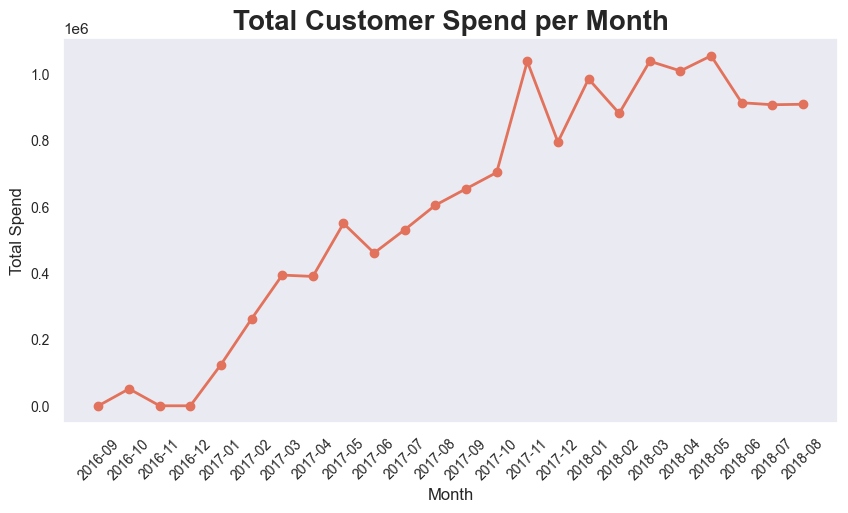

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(
    sum_spend_df["order_approved_at"],
    sum_spend_df["total_spend"],
    marker='o',
    linewidth=2,
    color="#E2725B"
)
plt.title("Total Customer Spend per Month", loc="center", fontsize=20, fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Month")
plt.ylabel("Total Spend")
plt.grid()
plt.show()

### Pertanyaan 5: Lokasi geografis manakah yang memiliki pelanggan terbanyak?

In [83]:
other_state_geolocation = all_df['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
max_state = all_df['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [84]:
geolocation_silver = all_df['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [85]:
customers_silver = all_df['customers'].merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [86]:
customers_silver.to_csv("dashboard/geolocation.csv", index=False)

In [87]:
gdf = gpd.GeoDataFrame(customers_silver, geometry=gpd.points_from_xy(customers_silver['geolocation_lng'], customers_silver['geolocation_lat']))

In [88]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title("Customer Locations in Brazil", fontsize=20, fontweight='bold')
    data.plot(ax=ax, marker='o', color='#E2725B', markersize=5, alpha=0.5)
    plt.axis('off')
    ax.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4])
    plt.show()

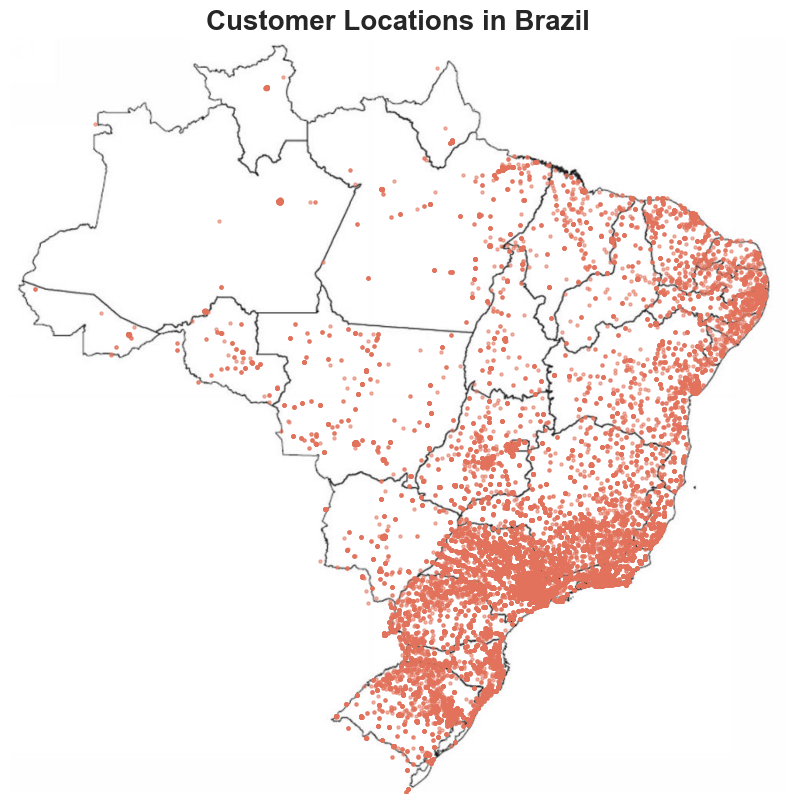

In [89]:
plot_brazil_map(gdf.drop_duplicates(subset='customer_unique_id'))

### Visualisasi RFM

- R-Recency
- F-Frequency
- M-Monetary

In [90]:
rfm

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,339,1,89.80
1,000161a058600d5901f007fab4c27140,460,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,598,1,179.99
3,0002414f95344307404f0ace7a26f1d5,429,1,149.90
4,000379cdec625522490c315e70c7a9fb,200,1,93.00
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,204,3,164.70
99437,fffeda5b6d849fbd39689bb92087f431,150,1,47.90
99438,ffff42319e9b2d713724ae527742af25,128,1,199.90
99439,ffffa3172527f765de70084a7e53aae8,412,2,21.80


In [91]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


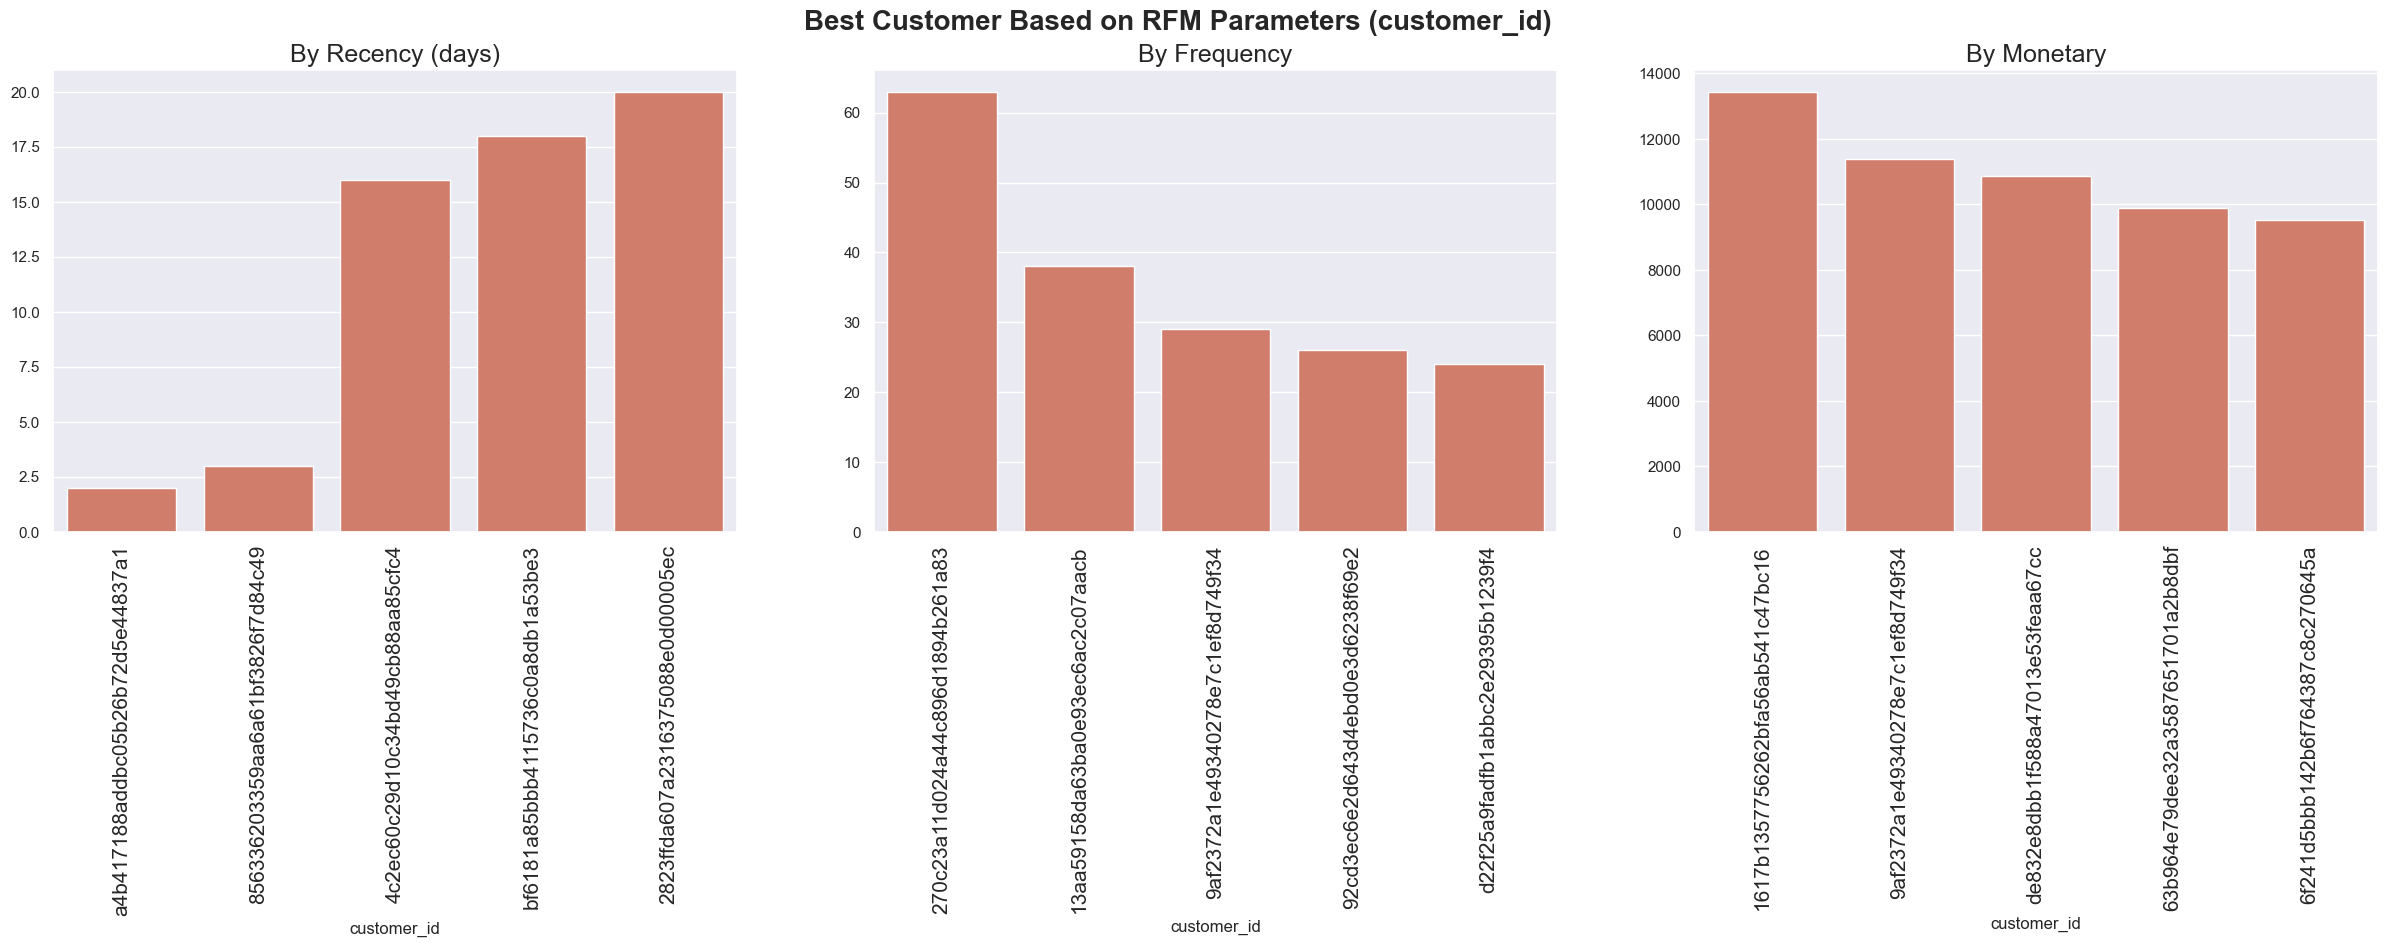

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#E2725B", "#E2725B", "#E2725B", "#E2725B", "#E2725B"]

recency_data = rfm.sort_values(by="Recency", ascending=True).head(5)
sns.barplot(y="Recency", x="customer_id", data=recency_data, hue="customer_id", palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticks(range(len(recency_data)))
ax[0].set_xticklabels(recency_data['customer_id'].values, rotation=90)

frequency_data = rfm.sort_values(by="Frequency", ascending=False).head(5)
sns.barplot(y="Frequency", x="customer_id", data=frequency_data, hue="customer_id", palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticks(range(len(frequency_data)))
ax[1].set_xticklabels(frequency_data['customer_id'].values, rotation=90)

monetary_data = rfm.sort_values(by="Monetary", ascending=False).head(5)
sns.barplot(y="Monetary", x="customer_id", data=monetary_data, hue="customer_id", palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticks(range(len(monetary_data)))
ax[2].set_xticklabels(monetary_data['customer_id'].values, rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20, fontweight='bold')
plt.show()

## Conclusion

- Produk apa dengan jumlah pembelian paling banyak dan paling sedikit?

Berdasarkan data yang divisualisasikan,pembelian customer terbesar ada pada produk **beth_bad_table** dan pembelian produk terkecil pada **security_and_service**.

- Bagaimana tingkat kepuasan pembeli terhadap layanan?

**Tingkat kepuasan customer memuaskan**,hal ini dapat dibuktikan berdasarkan data yang divisualisasikan,nilai rating pada kebanyakan customer berikan pada nilai sempurna,yakni nilai 5,dengan nilai rata-rata diangka 4 jika dibulatkan.

- Bagaimana data jumlah penjualan setiap bulan pada?

Jumlah data penjualan bulanan berfluktuatif, pada **bulan November 2017 dengan penjualan terbanyak sebesar 9191** dan **bulan November 2017 dengan penjualan tersedikit sebesar 0**.

- Berapa banyak jumlah uang yang dikeluarkan customer setiap bulan?

Jumlah uang **terbanyak** yang dikeluarkan customer adalah pada **bulan May 2018 sebesar 1056093.87** dan **tersedikit pada bulan November 2016 sebesar 0**.

- Lokasi geografis manakah yang memiliki pelanggan terbanyak?

Berdasarkan grafik yang dibuat pelanggan paling banyak ada di bagian **tenggara dan selatan**. Informasi lainnya, pelanggan lebih banyak berada di kota-kota yang merupakan ibu kota (Sao Paulo, Rio de Janeiro, Porto Alegre, dan lain-lain).